# 1b

           DATE  CASES
0    2020-03-01     19
1    2020-03-02     19
2    2020-03-03     34
3    2020-03-04     53
4    2020-03-05     81
...         ...    ...
1056 2023-01-21    156
1057 2023-01-22    119
1058 2023-01-23    663
1059 2023-01-24    405
1060 2023-01-25      3

[1061 rows x 2 columns]


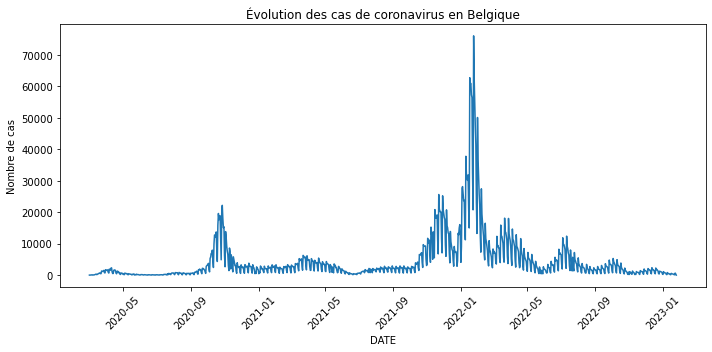

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("corona_cases_belgium.csv", sep=';')
data["DATE"] = pd.to_datetime(data["DATE"])
print(data)

# Tracé
plt.figure(figsize=(10,5))
plt.plot(data["DATE"], data["CASES"])

plt.xlabel("DATE")
plt.ylabel("Nombre de cas")
plt.title("Évolution des cas de coronavirus en Belgique")
plt.xticks(rotation=45)  # pour lire les dates plus facilement
plt.tight_layout()
plt.show()

4421.7709707822805


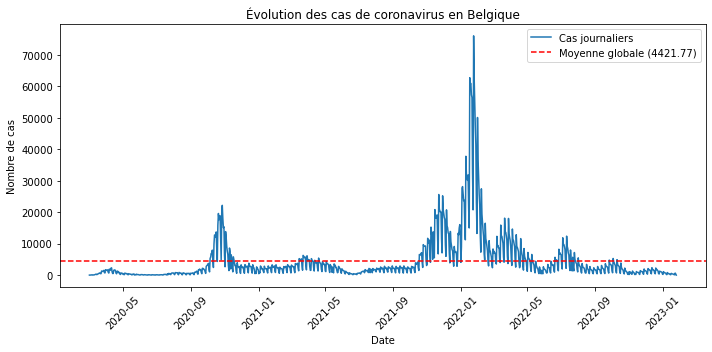

In [2]:
moyenne = data['CASES'].mean()
print(moyenne)

# Tracé
plt.figure(figsize=(10,5))

# Cas journaliers
plt.plot(data["DATE"], data["CASES"], label="Cas journaliers")

# Ligne horizontale pour la moyenne
plt.axhline(y=moyenne, color="red", linestyle="--", label=f"Moyenne globale ({moyenne:.2f})")

plt.xlabel("Date")
plt.ylabel("Nombre de cas")
plt.title("Évolution des cas de coronavirus en Belgique")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

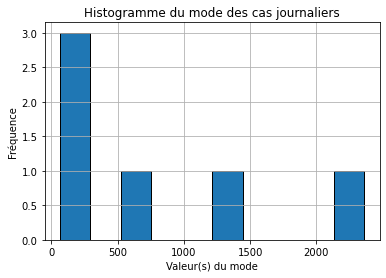

Mode des cas journaliers : [  64   99  224  662 1216 2361]


In [3]:
# Récupérer le(s) mode(s)
mode = data['CASES'].mode()

# Histogramme via pandas
mode.hist(edgecolor="black")

plt.xlabel("Valeur(s) du mode")
plt.ylabel("Fréquence")
plt.title("Histogramme du mode des cas journaliers")
plt.show()

print("Mode des cas journaliers :", mode.values)

# 2

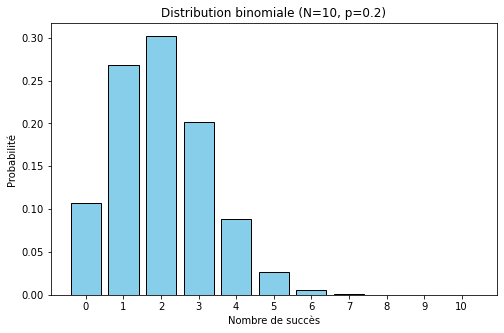

In [4]:
from scipy.stats import binom
import numpy as np

p = 0.2
N = 10

# Valeurs possibles (0 à N succès)
x = np.arange(0, N+1)

# Probabilités pour chaque nombre de succès
prob = binom.pmf(x, N, p)

plt.figure(figsize=(8,5))
plt.bar(x, prob, color="skyblue", edgecolor="black")
plt.xlabel("Nombre de succès")
plt.ylabel("Probabilité")
plt.title(f"Distribution binomiale (N={N}, p={p})")
plt.xticks(x)
plt.show()

# 3

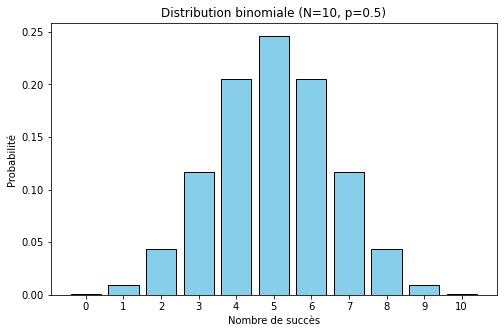

In [5]:
p = 0.5

# Probabilités pour chaque nombre de succès
prob = binom.pmf(x, N, p)

plt.figure(figsize=(8,5))
plt.bar(x, prob, color="skyblue", edgecolor="black")
plt.xlabel("Nombre de succès")
plt.ylabel("Probabilité")
plt.title(f"Distribution binomiale (N={N}, p={p})")
plt.xticks(x)
plt.show()

In [9]:
# Exercice 4

import numpy as np
from scipy.stats import binom

# 4 enfants par famille
n = 4

# probabilité d'avoir un garçon
p = 0.5

N_familles = 2000

x = np.arange(0, n + 1)
prob = binom.pmf(x, n, p)

# (a) Au moins 1 garçon
au_moins_1_garcon = (1 - binom.pmf(0, n, p)) * N_familles

# (b) Exactement 2 garçons
exactement_2_garcons = binom.pmf(2, n, p) * N_familles

# (c) Au plus 2 garçons
au_plus_2_garcons = binom.cdf(2, n, p) * N_familles

# (d) 1 ou 2 filles  <=> 2 ou 3 garçons
une_ou_deux_filles = (binom.pmf(2, n, p) + binom.pmf(3, n, p)) * N_familles

# (e) Aucune fille <=> 4 garçons
aucune_fille = binom.pmf(4, n, p) * N_familles

print(f"(a) Au moins 1 garçon : {au_moins_1_garcon:.0f} familles")
print(f"(b) Exactement 2 garçons : {exactement_2_garcons:.0f} familles")
print(f"(c) Au plus 2 garçons : {au_plus_2_garcons:.0f} familles")
print(f"(d) 1 ou 2 filles : {une_ou_deux_filles:.0f} familles")
print(f"(e) Aucune fille : {aucune_fille:.0f} familles")

(a) Au moins 1 garçon : 1875 familles
(b) Exactement 2 garçons : 750 familles
(c) Au plus 2 garçons : 1375 familles
(d) 1 ou 2 filles : 1250 familles
(e) Aucune fille : 125 familles


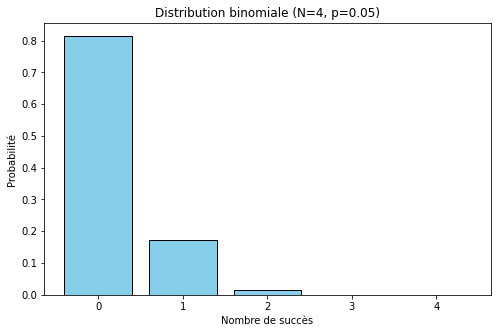

(a) exactement une déffectueuse : 0.17%
(b) aucune déffectueuse : 0.81%
(C) au plus 2 déffectueuses : 1.0%


In [23]:
# Exercice 5
p = 0.05
n = 4
x = range(0,n+1)

prob = binom.pmf(x,n,p)

plt.figure(figsize=(8,5))
plt.bar(x, prob, color="skyblue", edgecolor="black")
plt.xlabel("Nombre de succès")
plt.ylabel("Probabilité")
plt.title(f"Distribution binomiale (N={n}, p={p})")
plt.xticks(x)
plt.show()


print(f"(a) exactement une déffectueuse : {binom.pmf(1,n,p):0.2}%")
print(f"(b) aucune déffectueuse : {binom.pmf(0,n,p):0.2}%")
print(f"(C) au plus 2 déffectueuses : {binom.pmf(0,n,p) + binom.pmf(1,n,p) + binom.pmf(2,n,p):0.2}%")

In [37]:
# Exercice 6

from scipy.stats import norm

N = 500
# (cm)
mu = 151
sigma = 15

# (a) entre 120 et 155 cm
proba_a = norm.cdf(155,mu,sigma) - norm.cdf(120,mu,sigma)
nb_a = proba_a * N
print(f"(a) le nombre d'élèves entre 120 et 155 cm : {nb_a:.0f} avec une proba de {proba_a:0.2}")


# (b) > 185cm

proba_b = 1- norm.cdf(185,mu,sigma)
nb_b = proba_b * N
print(f"(b) le nombre d'élèves à plus de 185cm : {nb_b:.0f} avec une proba de {proba_b:0.2}")

(a) le nombre d'élèves entre 120 et 155 cm : 293 avec une proba de 0.59
(b) le nombre d'élèves à plus de 185cm : 6 avec une proba de 0.012


In [38]:
# Exercice 7 pas fait en classe mais correction sur moodle

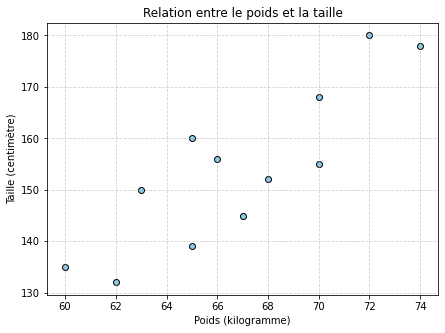

In [49]:
# Exercice 8
df = pd.read_csv('CourbePoidsTaille.csv',sep=';')

# Création du nuage de points
plt.figure(figsize=(7,5))
plt.scatter(df['Poids'], df['Taille'], color="skyblue", edgecolor="black")

# Titres et labels
plt.title("Relation entre le poids et la taille")
plt.xlabel("Poids (kilogramme)")
plt.ylabel("Taille (centimètre)")

# Grille pour plus de lisibilité
plt.grid(True, linestyle="--", alpha=0.6)

plt.show()

In [ ]:
# Khey, pour la suite de l'exercice 8 fallait tout faire en 1 minute bébé, tu n'est pas ingénieur à la nasa ou quoi ?